# Artem Moskalev. Home Assignment -- 3

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

<br/> <!--Intentionally left blank-->

<hr/> <!--Intentionally left blank-->

<h1><center><span style="color:red;">**IMPORTANT NOTICE FOR THIS PART**</span></center></h1>

Before submitting, **please**, make sure that your notebook runs **without errors** in Python 3.6
and **reproduces your solution as intended**, when you **Restart the Kernel and re-run the whole
notebook**!
<span style="color:red;">You will be severely penalized if you notebook does not run.</span>

Where it is possible, your solution will be graded based on **plots**, generated by **your code** on **TA's** laptop.

<hr/> <!--Intentionally left blank-->

<br/> <!--Intentionally left blank-->

# Part 1: Dimensionality reduction

In this part you are asked to complete a couple of practical tasks and prove an important theoretical result.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

<br/> <!--Intentionally left blank-->

## Task 1 (5 pt.):  A warmup with simple PCA

Here we will remember how to use Principal Component Analysis for artficial data.

### Task 1.1 (2 pt.)

* Load data using `sklearn.datasets.make_blobs` generator ([reference](http://scikit-learn.org/stable/modules/classes.html#samples)). Choose 1000 observations, and 100 dimensions.  
* Visualize data for the first two dimensions and color them according to their class. 
* Apply PCA so that 90% of the variance is explained. Output the number of principal components. 
* Visualize the transformed data for the first 2 components. Is it linearly separable? 
* Apply KernelPCA with RBF kernel with 2 components. Choose `gamma` in order to obtain linear separability. Plot data on first 2 components. 

Number of principle components in PCA: 2


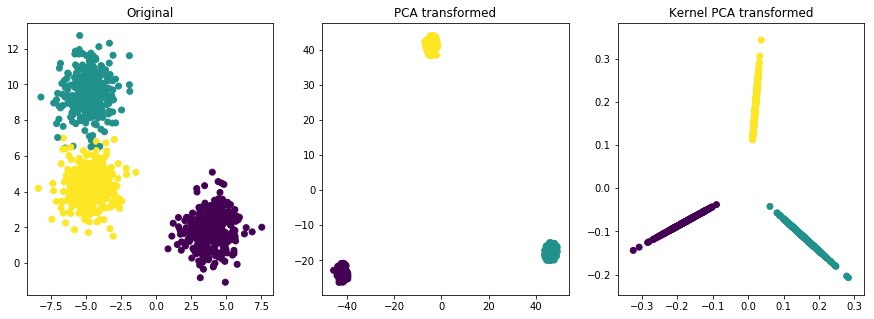

In [2]:
### BEGIN Solution

from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA, KernelPCA

data = make_blobs(1000,100)

fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].scatter(data[0][:,0], data[0][:,1], c=data[1]);
ax[0].set_title('Original')

pca = PCA(n_components=0.9)
data_transformed = pca.fit_transform(data[0])
print("Number of principle components in PCA:", pca.n_components_)

ax[1].scatter(data_transformed[:,0], data_transformed[:,1], c=data[1])
ax[1].set_title('PCA transformed')

kernel_pca = KernelPCA(n_components = 2, kernel='rbf', gamma=0.015)
data_transformed_rbf = kernel_pca.fit_transform(data[0])

ax[2].scatter(data_transformed_rbf[:,0], data_transformed_rbf[:,1], c=data[1])
ax[2].set_title('Kernel PCA transformed');
### END Solution

Cheers, it's linearly separable

<br/> <!--Intentionally left blank-->

### Task 1.2 (3 pt.)

* Load data using `sklearn.datasets.make_circles` generator ([reference](http://scikit-learn.org/stable/modules/classes.html#samples)). Choose 1000 observations, noise=0.1, factor=0.3.
* Visualize the data and color points them according to their class.
* Apply the PCA with 1 principal component. Print and comment on the explained variance ratio.
* Visualize the transformed data for the first principal component. Is it linearly separable? 
* Apply the KPCA with the RBF kernel with 1 component. Select the best `gamma` parameter for the kernel.
    * For this, plot the projection of the data on the first principal component. What is the first `gamma` when data become linearly separable? 

Explained variance ratio: 0.506688100029


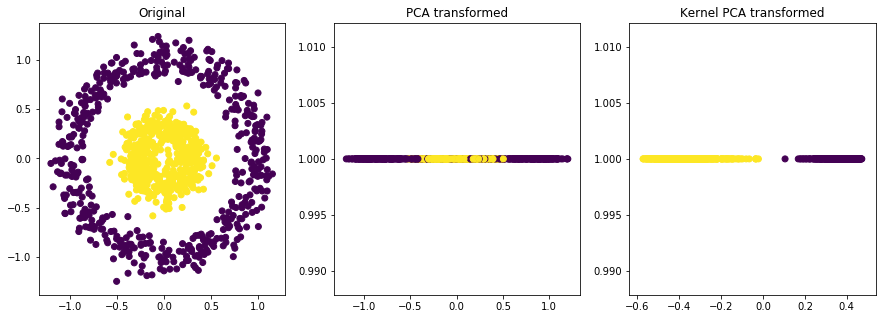

In [3]:
### BEGIN Solution

from sklearn.datasets import make_circles
np.random.seed(1011)
circles = make_circles(1000, noise=0.1, factor=0.3)

fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].scatter(circles[0][:,0], circles[0][:,1], c=circles[1]);
ax[0].set_title('Original')

pca = PCA(n_components=1)
circles_transformed = pca.fit_transform(circles[0])
print('Explained variance ratio:', pca.explained_variance_ratio_[0])
ax[1].scatter(x=circles_transformed,y=np.ones_like(circles_transformed), c=circles[1])
ax[1].set_title('PCA transformed')

kernel_pca = KernelPCA(n_components=1, kernel='rbf', gamma=2)
circles_transformed_kernel = kernel_pca.fit_transform(circles[0])

ax[2].scatter(x=circles_transformed_kernel,y=np.ones_like(circles_transformed_kernel), c=circles[1])
ax[2].set_title('Kernel PCA transformed');

### END Solution

Since our data is 2 dimentional and symmetric 100% variance can be explained with 2 components, hence 1 component is able to explain only 50% of variance (when use linear kernel). P.S. our data is not separable if apply 1 principle component. (with linear kernel). <br><br>

The first gamma when data, transformed with Kernel PCA, becomes linearly separable is 2.

<br/> <!--Intentionally left blank-->

## Task 2 (10 pt.):  Manifold learning

Try Kernel PCA, Laplacian Eigenmaps, Locally Linear Embedding and Isomap to find the best representation of 3D Datasets composed of 1000 points each.

In this task, you must try to determine which is the most suitable non-linear projection method to uncover the ’true’ low-dimensional representation of 3D dataset. To address this you need to answer the following questions:
* What is the underlying manifold that we want to uncover?
* Once we know what low-dimensional representation to expect, which method seems the most suitable?
* For each method, what are the necessary hyper-parameters we have to tune and how can we select them?

So, try out Kernel PCA, Laplacian Eigenmaps, Locally Linear Embedding and Isomap with different parameters, plot the embedded data and comment on which method works better and why, if at all.

In [4]:
from sklearn.datasets import make_s_curve

In [5]:
X, color = make_s_curve(1000, noise = 0.1, random_state = 42)

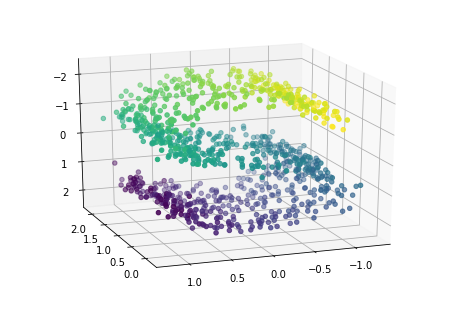

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1)
ax = Axes3D(fig, elev=-160, azim=110)
# pca = PCiginal = pca.inverse_transform(X_iris_transformed)
ax.scatter(X[:,0], X[:,1], X[:, 2], c=color)
plt.show()

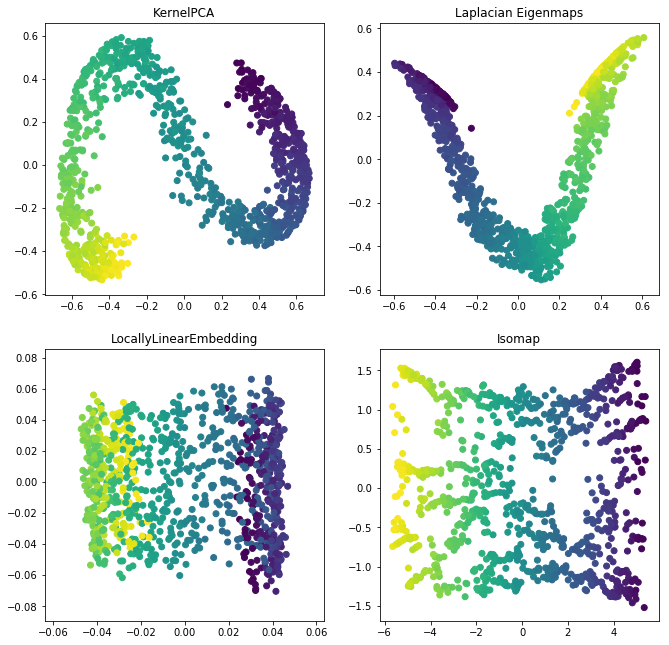

In [7]:
### BEGIN Solution

from sklearn.manifold import LocallyLinearEmbedding, SpectralEmbedding, Isomap

fig, ax = plt.subplots(2,2, figsize=(11,11))

kernel_PCA = KernelPCA(n_components=2, kernel='rbf')
transformed_kernel = kernel_PCA.fit_transform(X)
ax[0,0].scatter(transformed_kernel[:,0], transformed_kernel[:,1], c=color)
ax[0,0].set_title('KernelPCA')

laplacian_em = SpectralEmbedding()
transformed_em = laplacian_em.fit_transform(X)
ax[0,1].scatter(transformed_em[:,0], transformed_em[:,1], c=color)
ax[0,1].set_title('Laplacian Eigenmaps')

lle = LocallyLinearEmbedding(n_neighbors=50)
transformed_lle = lle.fit_transform(X)
ax[1,0].scatter(transformed_lle[:,0], transformed_lle[:,1], c=color)
ax[1,0].set_title('LocallyLinearEmbedding')

iso = Isomap()
transformed_iso = iso.fit_transform(X)
ax[1,1].scatter(transformed_iso[:,0], transformed_iso[:,1], c=color)
ax[1,1].set_title('Isomap');

### END Solution

Which one works better and why?

 - Since our manifold is 2d, I believe that we should be trying to fit our data with 2 components. For Kernel PCA I basicly just set the type of kernel and n_components, I also experimented with gamma, but default gamma seems to work absolutely okay. For Laplacian eigenmap I tried to tune n_neighbors and gamma, but it didn't change anything in general, so I leaved the model with default parameters. For LocallyLinearEmbedding I tuned n_neighbors to more or less approximate the plane, other parameters tuning made the transformed data only worse. On the other hand, Isomap works absolutely okay with default parameters, I tried to tune them a bit, but it didn't give any considerable enhancement.

 - Our manifold is 2d S-shaped plane embeded in 3d original feature space. The best manifold learning technique here, in my opnion, is Isomap. It perfectly uncovers the 2d plane structure of our data.

<br/> <!--Intentionally left blank-->

## Task 3 (20 pt.): Cocktail party problem

In this task you are asked to solve cocktail party problem. There is are two sound files, each of them contains a recording of two mixed sources. The trick is that in one recording one of the sources is closer to the microphone, in oter another source is closer. That property will help us to some extent to separate sound sources and generate two new files, for which the respective source will be more clear and loud.

<img src="party.jpg" alt="Stamp Algo" style="height: 500px;"/>

In our case we have two sources and two microphones.

Now try to use Independent Component Analysis in order to obtain independent components, each of which will hopefully correspond to its own source. The loaded data arrays have the following structure: a number corresponding to sampling rate and an array of amplitudes of a recording itself.

Remember that you will have to **scale down your data** by a factor of $2^{15}$ so that that your observations are between -1 and 1. Also, do not forget to scale your data again *after transformation*. *You need to do this since the sound data is in 16-bit PCM WAV container.*

Plot the time series for initial recordings and new transformed ones, and plot them side by side.

In [8]:
from scipy.io import wavfile
import IPython.display as ipd
from sklearn.decomposition import FastICA

In [9]:
rate_1, data_1 = wavfile.read('rsm2_mA.wav')
rate_2, data_2 = wavfile.read('rsm2_mB.wav')

In [10]:
ipd.Audio(data_1, rate=rate_1)

In [11]:
ipd.Audio(data_2, rate=rate_2)

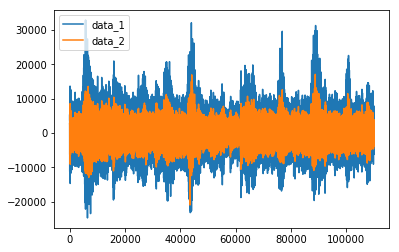

In [12]:
plt.plot(data_1, label='data_1')
plt.plot(data_2, label='data_2')
plt.legend();

In [13]:
def scale(data, factor=2**15):
    max_, min_ = np.abs(data.max()), np.abs(data.min())
    if min_ > max_:
        scale_factor = min_
    else:
        scale_factor = max_
    if factor:
        scale_factor = factor
    return np.copy(data / scale_factor)

In [14]:
data_1_scaled = scale(data_1)
data_2_scaled = scale(data_2)

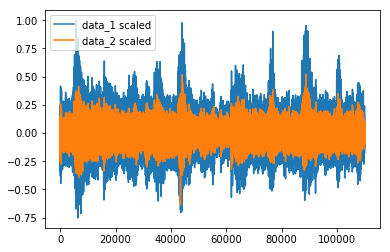

In [15]:
plt.plot(data_1_scaled, label='data_1 scaled')
plt.plot(data_2_scaled, label='data_2 scaled')
plt.legend();

In [16]:
signals = np.empty((2,data_1.shape[0]))
signals[0] = data_1_scaled.copy()
signals[1] = data_2_scaled.copy()

In [17]:
### BEGIN Solution

ica = FastICA(n_components=2)
transformed = ica.fit_transform(signals.T)
transformed = scale(transformed)
### END Solution

In [18]:
s1 = transformed.T[0]
s2 = transformed.T[1]

In [19]:
s1 = scale(s1, factor=False)
s2 = scale(s2, factor=False)

In [20]:
ipd.Audio(s1, rate=rate_1)

In [21]:
ipd.Audio(s2, rate=rate_2)

 - I wouldn't say that separation is perfect, but we can observe that one sample now has the voice part much more specified than in the beggingng, an other sample, on the other hand, has this voice suppresed as it supposed to be. I tried to tune hyperparameters (algorithm, max_iter, tol), but I could not find better combination than a default one.

At this point you might want to check how your algorithm performed and generate audio. **WARNING** be careful with the output file, if you messed up with amplitudes, the audio may be **extremely** loud. You are recommended not to use headphones and doublecheck whether your data arrays are scaled (TA experienced that himself and was not happy).

<br/> <!--Intentionally left blank-->

# Part 2: Artificial Neural Networks

In this part you are asked to play around with different aspects of neural networks using PyTorch and try to understand their influence on the final result.

In [25]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim

In [26]:
import tqdm

<br/> <!--Intentionally left blank-->

## Task 1 (3 pt.): Activation Functions

In this task, you will understand how and why use different [activation functions](http://pytorch.org/docs/master/nn.html#non-linear-activations). For each of three following ponts, plot functions on one figure.

* ReLU, ELU, Softplus;
* Sigmoid, Softsign, Tanh;
* Softmax.

/home/art_mos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


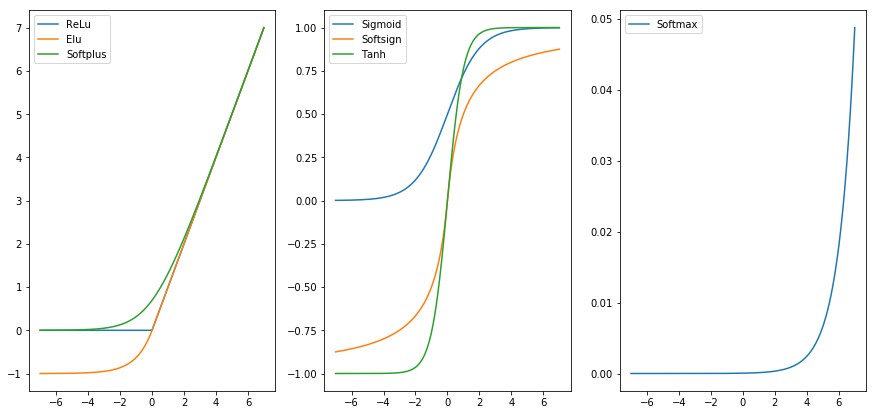

In [27]:
### BEGIN Solution

relu = lambda x: F.relu(x).data.numpy()
elu = lambda x: F.elu(x).data.numpy()
softplus = lambda x: F.softplus(x).data.numpy()
sig = lambda x: F.sigmoid(x).data.numpy()
softsign = lambda x: F.softsign(x).data.numpy()
tanh = lambda x: F.tanh(x).data.numpy()
softmax = lambda x: F.softmax(x).data.numpy()
activations = [relu, elu, softplus, sig, softsign, tanh, softmax]
labels = ('ReLU','ELU','Softplus','Sigmoid','Softsign', 'Tanh','Softmax')

fig, ax = plt.subplots(1,3, figsize=(15,7))
t = torch.arange(-7,7,step=0.05)
t = Variable(t)

ax[0].plot(t.data.numpy(), relu(t), label='ReLu')
ax[0].plot(t.data.numpy(), elu(t), label='Elu')
ax[0].plot(t.data.numpy(), softplus(t), label='Softplus')
ax[0].legend()

ax[1].plot(t.data.numpy(), sig(t), label='Sigmoid')
ax[1].plot(t.data.numpy(), softsign(t), label='Softsign')
ax[1].plot(t.data.numpy(), tanh(t), label='Tanh')
ax[1].legend()

ax[2].plot(t.data.numpy(), softmax(t), label = 'Softmax')
ax[2].legend();
### END Solution

<br/> <!--Intentionally left blank-->

## Task 2 (35 + 5 pt.): Your own Neural Network

This big task is intended to familiarize you with how different NN architectures perform, what may be changed, and what effect that may cause.

### Task 2.1 (15 pt.): Define your architecture and check how it works for classification of moons dataset.

First, you need to code a working prototype of your network.

* Fill in the class MLPNet. Set SGD optimizer
* Import and generate moons dataset with 2000 samples, noise = 0.3 and random state = 0. Standardize you data.
* Split data in train and test sets 80/20, train your model and see how it performs on test.
* Plot the decision boundary.

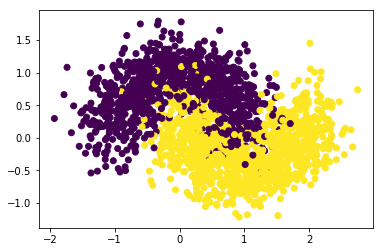

In [28]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=2000, noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
plt.scatter(X[:,0],X[:,1], c=y);

 - I don't fully understand the way you create batches and proccess iterations routine, so I suggest a more convinient (in my opinion) way of how to feed the data to fit our model. I want to use standard PyTorch DataLoader, but it works only with PyTorch datasets, so let's create a wrap for our moons dataset:

In [29]:
class Moons_dataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X).float()
        self.y = torch.from_numpy(y).float()
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        Xs = self.X[index,:]
        ys = self.y[index]
        
        return Xs, ys

In [30]:
train_moons = Moons_dataset(X_train, y_train)

In [31]:
def fit(mlp, data, epochs=1, lr=.2, batch_size=101):
    
    # here, instead of dinamictly calculating batches we will just make our dataset itarable for Pytorch with standart
    #function
    
    feeder = torch.utils.data.DataLoader(dataset=data, batch_size=batch_size) 
    solver = torch.optim.SGD(mlp.parameters(), lr=lr)
    loss = nn.BCELoss()
    
    loss_list = list()
    
    for epoch in tqdm.tqdm(range(epochs)):
        for data_, label_ in feeder: #n_batches remaines the same
            inputs = Variable(data_)
            true_outputs = Variable(label_)

            solver.zero_grad()

            pred_outputs = mlp(inputs)
            loss_ = loss(pred_outputs.float().view(-1), true_outputs.float())
            loss_list.append(loss_.data.numpy()[0])
            loss_.backward()

            solver.step()
    return mlp, loss_list

In [32]:
mlp = nn.Sequential(nn.Linear(2,150), nn.ReLU(), nn.Linear(150,1), nn.Sigmoid())

# in order to obtain your predictions after fit, use

model1, loss_init = fit(mlp, data=train_moons)

100%|██████████| 1/1 [00:00<00:00, 33.05it/s]


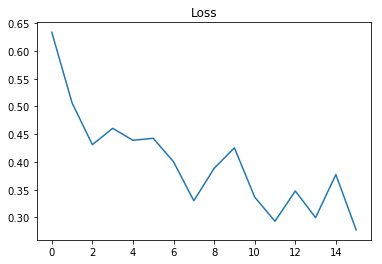

In [33]:
plt.plot(loss_init)
plt.title('Loss');

Loss is decreasing, so it works, cheers!

In [34]:
test_data = torch.from_numpy(X_test)
test_data = Variable(test_data).float()

proba = model1(test_data)

In [35]:
proba

Variable containing:
 0.0660
 0.2326
 0.6976
 0.1952
 0.0381
 0.0484
 0.6400
 0.8576
 0.7315
 0.9569
 0.2344
 0.1117
 0.1870
 0.0549
 0.5088
 0.2786
 0.0775
 0.0328
 0.1222
 0.8740
 0.5861
 0.1531
 0.5622
 0.9461
 0.0280
 0.5611
 0.1471
 0.0774
 0.0934
 0.5331
 0.8279
 0.0546
 0.5569
 0.6307
 0.3765
 0.0564
 0.1209
 0.2033
 0.1656
 0.0856
 0.3491
 0.5503
 0.0570
 0.7899
 0.4609
 0.8849
 0.1543
 0.6847
 0.8843
 0.9341
 0.9241
 0.7116
 0.1967
 0.8921
 0.1064
 0.9459
 0.1675
 0.4753
 0.9251
 0.7885
 0.4321
 0.1253
 0.9582
 0.8038
 0.2534
 0.4925
 0.2299
 0.0226
 0.3116
 0.2014
 0.0562
 0.7536
 0.0820
 0.3969
 0.1899
 0.0727
 0.0753
 0.9020
 0.4849
 0.0325
 0.9212
 0.9651
 0.1630
 0.1349
 0.0406
 0.0407
 0.9058
 0.3127
 0.0269
 0.0220
 0.0388
 0.6702
 0.9403
 0.9546
 0.8492
 0.0200
 0.1337
 0.2481
 0.6404
 0.0692
 0.7365
 0.0289
 0.8717
 0.9001
 0.2637
 0.8750
 0.9114
 0.1568
 0.0258
 0.2435
 0.6908
 0.1398
 0.8848
 0.7878
 0.0327
 0.6695
 0.6429
 0.6317
 0.0781
 0.6236
 0.0367
 0.9309
 0.

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

def estimate_accuracy(pred_probs, true, threshold=.5):
    preds = np.copy(pred_probs)
    preds[preds>threshold] = 1.
    preds[preds!=1.]= 0. 
    return roc_auc_score(preds, true)

In [37]:
estimate_accuracy(proba.data.numpy(), y_test)

0.83884128926968582

<br/> <!--Intentionally left blank-->

### Task 2.2 (10 + 5 pt.): Changing the parameters.

* First, see how your baseline network depends on data. Increase the number of samples, batch size and number of epochs
* For the original data and your initial architecture play with learning rate, implement decreasing learning rate over the epochs.
* Choose Adam optimizer. See how it performs for different learning rates
* Write down your observations (up to 5 extra grading points)

* First, see how your baseline network depends on data. Increase the number of samples, batch size and number of epochs

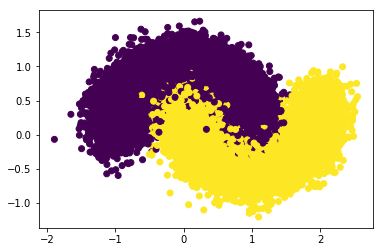

In [38]:
### BEGIN Solution

X_, y_ = make_moons(n_samples=20000, noise=0.2, random_state=0)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=0)

train_moons_ = Moons_dataset(X_train_, y_train_)

plt.scatter(X_[:,0],X_[:,1], c=y_);
### END Solution

In [39]:
mlp = nn.Sequential(nn.Linear(2,150), nn.ReLU(), nn.Linear(150,1), nn.Sigmoid())
model2, loss2 = fit(mlp,data=train_moons_, epochs=5, batch_size=200)

100%|██████████| 5/5 [00:00<00:00,  7.81it/s]


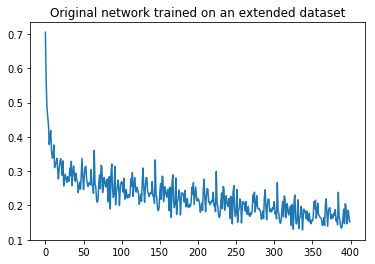

In [40]:
plt.plot(loss2);
plt.title('Original network trained on an extended dataset');

In [41]:
test_data = torch.from_numpy(X_test_)
test_data = Variable(test_data).float()

proba = model2(test_data)

print('Performance on extended data:',estimate_accuracy(proba.data.numpy(), y_test_))

Performance on extended data: 0.943883418026


* For the original data and your initial architecture play with learning rate, implement decreasing learning rate over the epochs.

In [42]:
losses = list()
scores = list()
rates = ('0.005','0.05','0.5','1.','1.5')

for each_lr in [0.005,0.05,0.5,1.,1.5]:
    mlp = nn.Sequential(nn.Linear(2,150), nn.ReLU(), nn.Linear(150,1), nn.Sigmoid())
    model_, current_loss = fit(mlp, train_moons, lr=each_lr)
    
    losses.append(current_loss)
    current_proba = model_(test_data)
    scores.append(estimate_accuracy(current_proba.data.numpy(), y_test_))

100%|██████████| 1/1 [00:00<00:00, 44.52it/s]


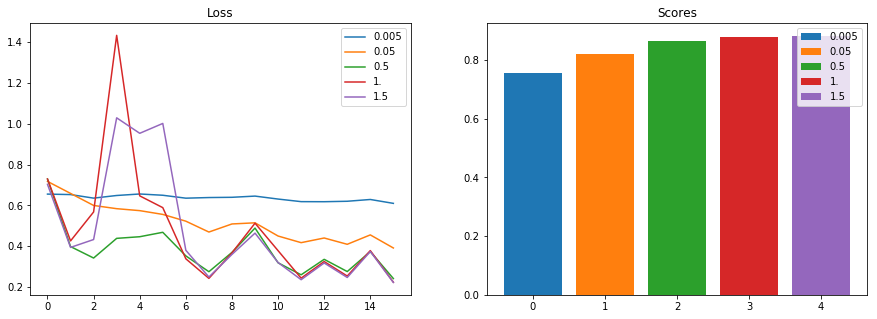

In [43]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

for i in range(len(rates)):
    ax[0].plot(losses[i], label=rates[i])
    ax[1].bar(i,scores[i], label=rates[i])
    
ax[0].set_title('Loss')
ax[0].legend()
ax[1].legend()
ax[1].set_title('Scores');

Let's now implement a dynamic learning rate:

In [44]:
def fit_decreasing(mlp, data, epochs=1, lr=.2, batch_size=101, decr=5):
    
    # here, instead of dinamictly calculating batches we will just make our dataset itarable for Pytorch with standart
    #function
    
    feeder = torch.utils.data.DataLoader(dataset=data, batch_size=batch_size) 
    solver = torch.optim.SGD(mlp.parameters(), lr=lr)
    
    loss = nn.BCELoss()
    
    loss_list = list()
    lrates = list()
    
    for epoch in tqdm.tqdm(range(epochs)):
        for data_, label_ in feeder: #n_batches remaines the same
            inputs = Variable(data_)
            true_outputs = Variable(label_)

            solver.zero_grad()

            pred_outputs = mlp(inputs)
            loss_ = loss(pred_outputs.float().view(-1), true_outputs.float())
            loss_list.append(loss_.data.numpy()[0])
            loss_.backward()

            solver.step()
        
        lrates.append(solver.param_groups[0]['lr'])
        solver.param_groups[0]['lr'] = solver.param_groups[0]['lr']/decr #each epoch we decrease the learning rate /5
    return mlp, loss_list, lrates

In [45]:
model_dec5, loss_dec5,lrates = fit_decreasing(nn.Sequential(nn.Linear(2,150), nn.ReLU(), nn.Linear(150,1), nn.Sigmoid()),data=train_moons, epochs=5, batch_size=200, decr=5)

100%|██████████| 5/5 [00:00<00:00, 57.11it/s]


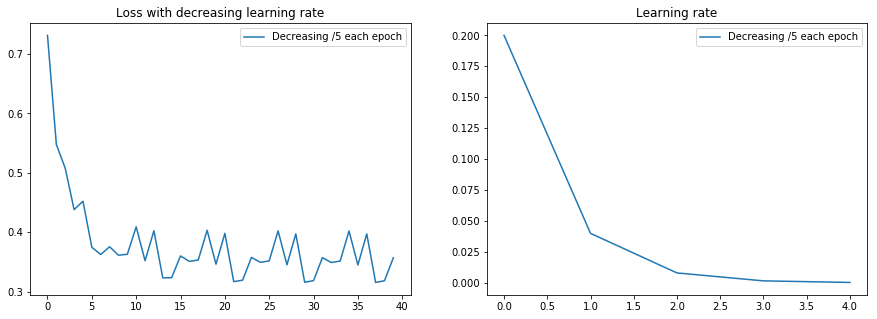

In [46]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(loss_dec5, label='Decreasing /5 each epoch')
ax[0].legend()
ax[0].set_title('Loss with decreasing learning rate');

ax[1].plot(lrates, label='Decreasing /5 each epoch')
ax[1].legend()
ax[1].set_title('Learning rate');

Interesting, seems, it stacked in the local minima

 - Choose Adam optimizer. See how it performs for different learning rates.

In [47]:
def fit_with_adam(mlp, data, epochs=1, lr=.2, batch_size=101, decr=False):
    
    # here, instead of dinamictly calculating batches we will just make our dataset itarable for Pytorch with standart
    #function
    
    feeder = torch.utils.data.DataLoader(dataset=data, batch_size=batch_size) 
    solver = torch.optim.Adam(mlp.parameters(), lr=lr)
    
    loss = nn.BCELoss()
    
    loss_list = list()
    lrates = list()
    
    for epoch in range(epochs):
        for data_, label_ in feeder: #n_batches remaines the same
            inputs = Variable(data_)
            true_outputs = Variable(label_)

            solver.zero_grad()

            pred_outputs = mlp(inputs)
            loss_ = loss(pred_outputs.float().view(-1), true_outputs.float())
            loss_list.append(loss_.data.numpy()[0])
            loss_.backward()

            solver.step()
        
        lrates.append(solver.param_groups[0]['lr'])
        if decr:
            solver.param_groups[0]['lr'] = solver.param_groups[0]['lr']/decr #each epoch we decrease the learning rate /5
    return mlp, loss_list, lrates

In [48]:
losses,scores,rates = list(), list(), ('0.001','0.005','0.01','0.5','0.1')

for each_lr in [0.001,0.005,0.01,0.5,0.1]:
    mlp = nn.Sequential(nn.Linear(2,150), nn.ReLU(), nn.Linear(150,1), nn.Sigmoid())
    model_adam, current_loss,_ = fit_with_adam(mlp, train_moons, lr=each_lr, decr=False)
    
    losses.append(current_loss)
    current_proba = model_adam(test_data)
    scores.append(estimate_accuracy(current_proba.data.numpy(), y_test_))

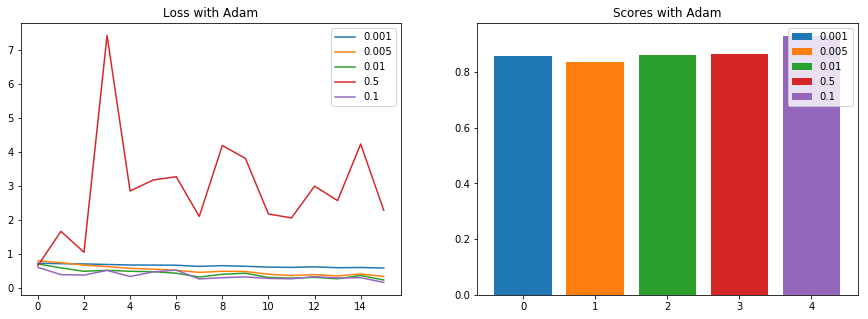

In [49]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

for i in range(len(rates)):
    ax[0].plot(losses[i], label=rates[i])
    ax[1].bar(i,scores[i], label=rates[i])
    
ax[0].set_title('Loss with Adam')
ax[0].legend()
ax[1].legend()
ax[1].set_title('Scores with Adam');

 - Write down your observations (up to 5 extra grading points)

Surprisingly, higher learning rates (but not too much) work better. We can see that with small learning rates (like 0.001) convergence is extremely slow. The number of epochs can be increased as well as the batch_size decreased to overcome this. On the other hand, while implementing decreasing learning rate, we observed that our algorithm might fall into a local minimum while we move towards the lower lr values. That actually tells us that the poorness of low learning rate on this particular dataset is caused by the nature of an objective, but not because of the lack of epochs of big batch_size. However, with too high learning rates the loss is not so stable. I also noticed that Adam optimizer provides faster convergence with lower learning rates. It seems reasonable because on each its iteration our "movement" towards the minima is corrected with the momentum, however, in SGD our steps are pretty harsh. This effect can also be seen on loss plots, where convergences with relatively higher learning rates in Adam are smoother.

<br/> <!--Intentionally left blank-->

### Task 2.3 (10 pt.): Compare with kNN.

Now you will see how your network performs compared to simple k Nearest Neighbors algorithm.

* Use moons dataset with 100, 500, 1000, 5000 samples
* For each datset train kNN algorithm with different numbers of neighbors between 2 and 10. Plot the data with decision boundary.
* For each dataset train your best Neural Network. Plot the data with decision boundary.
* Which one of these algorithms works better for smaller datasets? For larger ones?

* Use moons dataset with 100, 500, 1000, 5000 samples

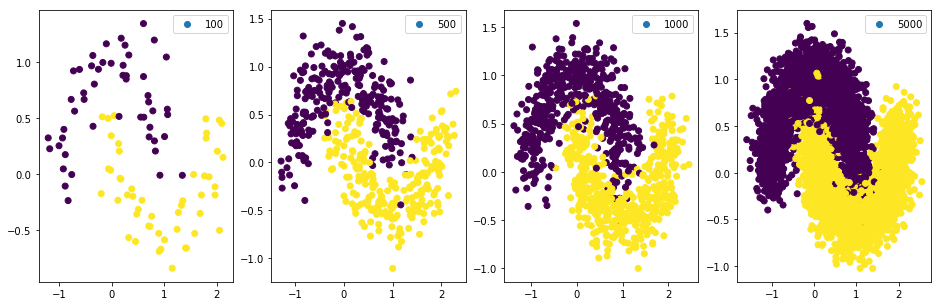

In [50]:
### BEGIN Solution

X100, y100 = make_moons(n_samples=100, noise=0.2, random_state=0)
X500, y500 = make_moons(n_samples=500, noise=0.2, random_state=0)
X1k ,y1k = make_moons(n_samples=1000, noise=0.2, random_state=0)
X5k, y5k = make_moons(n_samples=5000, noise=0.2, random_state=0)

X_train100, X_test100, y_train100, y_test100 = train_test_split(X100, y100, test_size=0.2, random_state=0)
X_train500, X_test500, y_train500, y_test500 = train_test_split(X500, y500, test_size=0.2, random_state=0)
X_train1k, X_test1k, y_train1k, y_test1k = train_test_split(X1k, y1k, test_size=0.2, random_state=0)
X_train5k, X_test5k, y_train5k, y_test5k = train_test_split(X5k, y5k, test_size=0.2, random_state=0)

fig, ax = plt.subplots(1,4, figsize=(16,5))
ax[0].scatter(X100[:,0],X100[:,1],c=y100, label='100')
ax[1].scatter(X500[:,0],X500[:,1],c=y500,label='500')
ax[2].scatter(X1k[:,0],X1k[:,1],c=y1k, label='1000')
ax[3].scatter(X5k[:,0],X5k[:,1],c=y5k, label='5000')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend();
### END Solution

* For each datset train kNN algorithm with different numbers of neighbors between 2 and 10. Plot the data with decision boundary.

In [51]:
from copy import deepcopy

def get_boundaries(model, X, y, type_model='knn',lr=False):
    
    def expand(a, b, factor=0.2):
        return a - abs(a) * factor, b + abs(b) * factor

    X_l, X_h = X.min(axis=0), X.max(axis=0)
    xx0, xx1 = np.meshgrid(np.linspace(*expand(X_l[0], X_h[0]), num=51), np.linspace(*expand(X_l[1], X_h[1]), num=51))
    X_grid = np.c_[xx0.ravel(), xx1.ravel()]

    if type_model=='knn':
        model.fit(X,y)
        z = np.apply_along_axis(lambda x: model.predict(x.reshape(1,-1)), axis=1, arr=X_grid)
        z=z.reshape(xx0.shape)
        return xx0, xx1, z
    
    elif type_model=='nn':
        res = list()
        ds = Moons_dataset(X, y)
        model_fitted,_,_ = fit_with_adam(deepcopy(model), ds, lr=lr)
        for each_row in X_grid:
            pred = model_fitted(Variable(torch.from_numpy(each_row)).float())
            res.append(pred.data.numpy()[0])
        res = np.array(res)
        #res[res>0.5]=1.
        #res[res!=1]=0.
        res = res.reshape(xx0.shape)
        return xx0, xx1, res

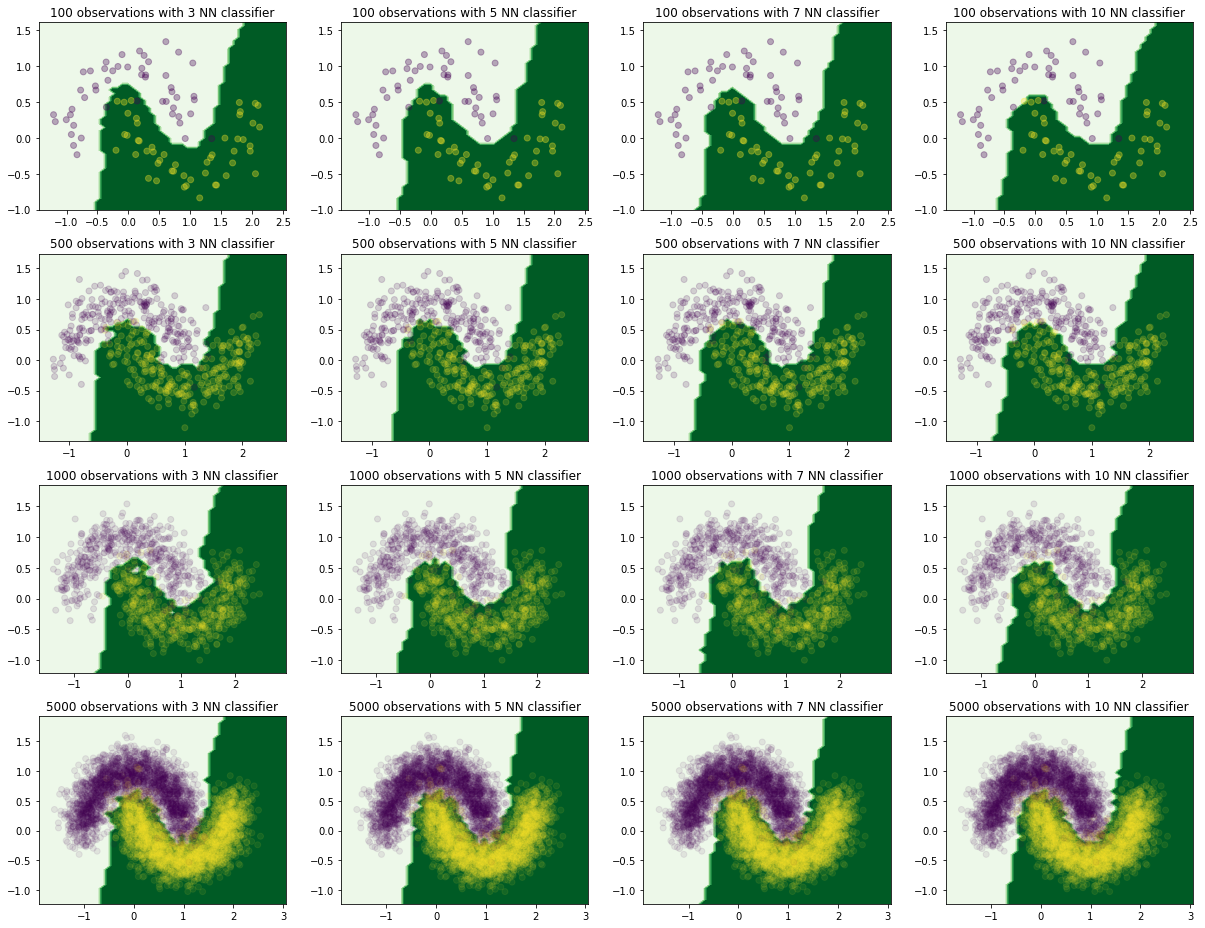

In [52]:
from sklearn.neighbors import KNeighborsClassifier

datasets = [(X100,y100),(X500,y500),(X1k,y1k),(X5k,y5k)]
ds_names = ('100','500','1000','5000')

fig, ax = plt.subplots(4,4, figsize=(17,13))

for i,each_dataset in enumerate(datasets):
    for j,k in enumerate([3,5,7,10]):
        knn = KNeighborsClassifier(k)
        knn.fit(each_dataset[0],each_dataset[1])
        
        xx,yy,zz = get_boundaries(knn, each_dataset[0], each_dataset[1], type_model='knn')
        
        ax[i,j].contourf(xx,yy,zz, cmap='Greens')
        ax[i,j].set_title(ds_names[i] + ' observations with ' +str(k) + ' NN classifier')
        ax[i,j].scatter(each_dataset[0][:,0],each_dataset[0][:,1], c=each_dataset[1], alpha=1./(3*(i+1)))
plt.tight_layout();

* For each dataset train your best Neural Network. Plot the data with decision boundary.

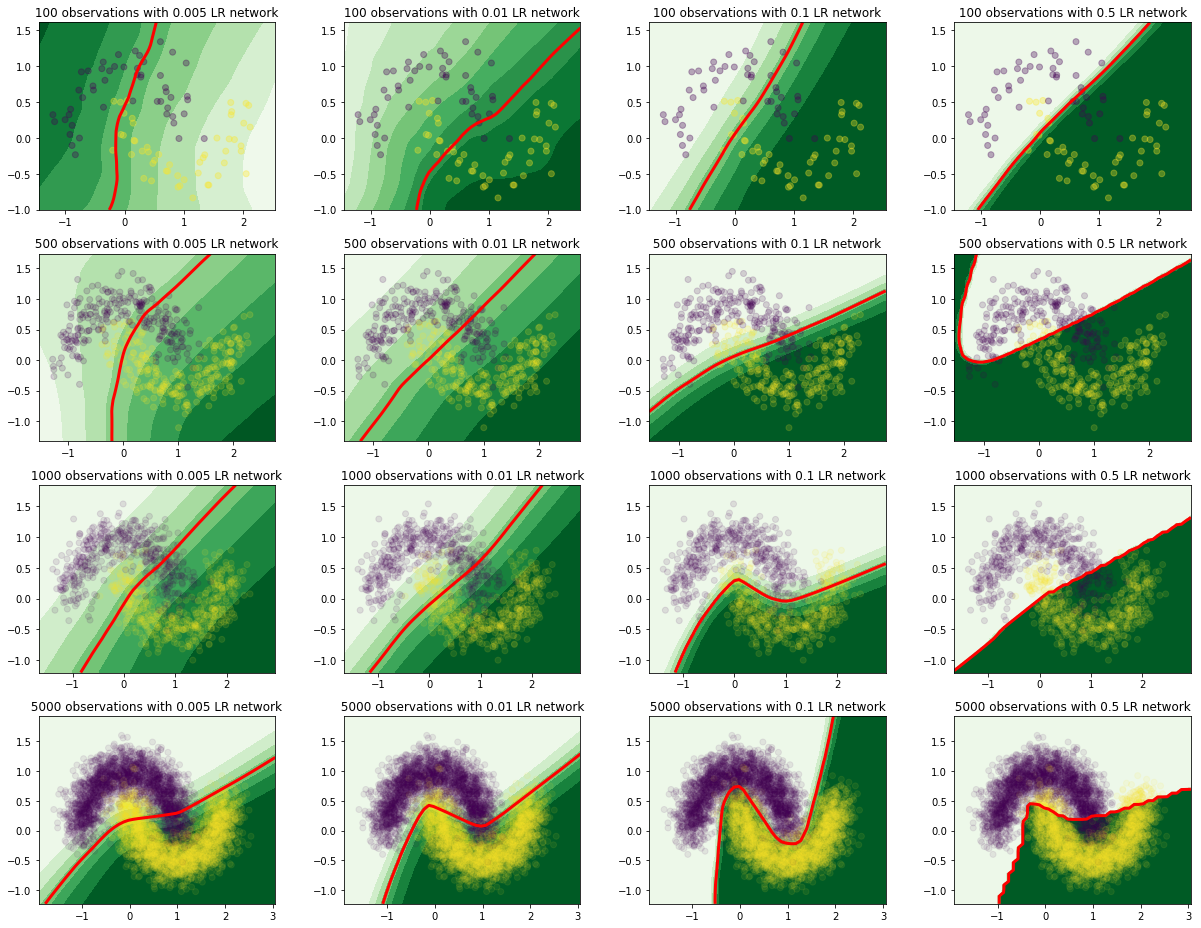

In [53]:
datasets = [(X100,y100),(X500,y500),(X1k,y1k),(X5k,y5k)]
ds_names = ('100','500','1000','5000')

fig, ax = plt.subplots(4,4, figsize=(17,13))

for i,each_dataset in enumerate(datasets):
    for j,lr in enumerate([0.005,0.01,0.1,0.5]):
        mlp = nn.Sequential(nn.Linear(2,150), nn.ReLU(), nn.Linear(150,1), nn.Sigmoid())        
        xx,yy,zz = get_boundaries(mlp, each_dataset[0], each_dataset[1], type_model='nn', lr=lr)
        ax[i,j].contour(xx, yy, zz, levels=[0.5],linewidths=3, colors='r')
        ax[i,j].contourf(xx,yy,zz, cmap='Greens')
        ax[i,j].set_title(' '+ds_names[i] + ' observations with ' + str(lr) + ' LR network ')
        ax[i,j].scatter(each_dataset[0][:,0],each_dataset[0][:,1], c=each_dataset[1], alpha=1./(3*(i+1)))
        
plt.tight_layout();

* Which one of these algorithms works better for smaller datasets? For larger ones?

For smaller datasets KNN works better, but if dataset is large enough and learning rate is taken correctly, neural network outperforms KNN.